# Linear Regression 
---

## Linear Regression Model
The goal of linear regression is to predict the linear function $ \hat{y} \in {\rm I\!R}$  of given input $ x \in {\rm I\!R}^{n} $.

That is, find $\hat{y}$ such that;

$
\hat{y} = f_{w}(x) = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} .... w_{n}x_{n} 
$
, where $x_{0}$ = 1

Here $w \in {\rm I\!R}$ controls the behavior of the system and determines how each feature affect the prediction.

- $w_{i} > 0 \to $ strengthen the feature $x_{i}$, hence the value of the prediction $\hat{y}$
- $w_{i} < 0 \to $ weaken the feature $x_{i}$, hence the value of the prediction $\hat{y}$
- $w_{i} = 0 \to $ the feature $x_{i}$ has no effect on the prediction $\hat{y}$

## Cost Function
We need to find $w$ such that $\hat{y}$ close to $y$, where $y \in {\rm I\!R}^{n}$ is the real/known value of given $x$.

In other words, we need to minimize the value $\hat{y}^{(i)}-y^{(i)}$  for each $i$ record  in the training dataset.

This can be represented in a cost function $J(w)$, which measures how close the $\hat{y}^{(i)}$ to $y^{(i)}$ for each value $w$.

$J(w)$ can be defined as the mean squared error (MSE);

$
J(w) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)}-y^{(i)})^{2}
$

## Learn Model Parameters   
There are two main approaches to find $w$ such that it minimizes $J(w)$.
- Normal Equation
- Gradient Descent

### Normal Equation
$J(w)$ is a convex function. Therefore, gradient of $J(w) = 0$ simply solves the values $w$ that minimizes $J(w)$:

$\nabla_{w} J(w) = 0$, which result:

$
w=(X^{T}X)^{-1}X^{T}y
$

But the computational complexity of $(X^{T}X)^{-1}$ againts number of features is $O(n^3)$.

### Gradient Descent
Gradient descent is another approach for finding $w$ that minimizes $J(w)$.
It is an optimization algorithm that tweaks $w$ iteratively to minimize $J(w)$.
    
Key points of the algorithm is:
- Stopping criteria
- Descent direction
- Learning rate (step size)


Gradient descent algorith can be explained as below


Repeat until converge {
    
$   
    w_{i} := w_{i} - \alpha\frac{\partial J(w)}{\partial w_{i}}, 
$   
where $\alpha$ is learning rate and $w_{i}$ for $i = 1..n$ (n is the number of features) is simultaneously updated.

    
}
    
Mathematically it can prove MSE cost function J(w):

$
\frac{\partial J(w)}{\partial w_{j}} = \frac{2}{m}\sum_{i=1}^{m}(W^{T}x^{(i)} - y^{(i)})x_{j}
$



## Boston Home Prices Prediction with Linear Regression

In this experiment, Bosten home prices given in [the dataset](https://www.kaggle.com/vikrishnan/boston-house-prices), are predicted using Linear regression.

The dataset is in the following fields:
    
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per USD 10000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in USD 1000
    
'MEDV' is the label and all the other fields can be considered as features.


In [488]:
import pandas as pd

def loadData(path):
    COLUMNS = ["crim", "zn", "indus", "chas", "nox", "rm", "age",
           "dis", "rad", "tax", "ptratio", "b", "lstat", "medv"]
    data = pd.read_csv(path, names=COLUMNS, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
    return data


data = loadData('data/housing.csv')
data.tail()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


Let's plot each feature against the housing price, MEDV.



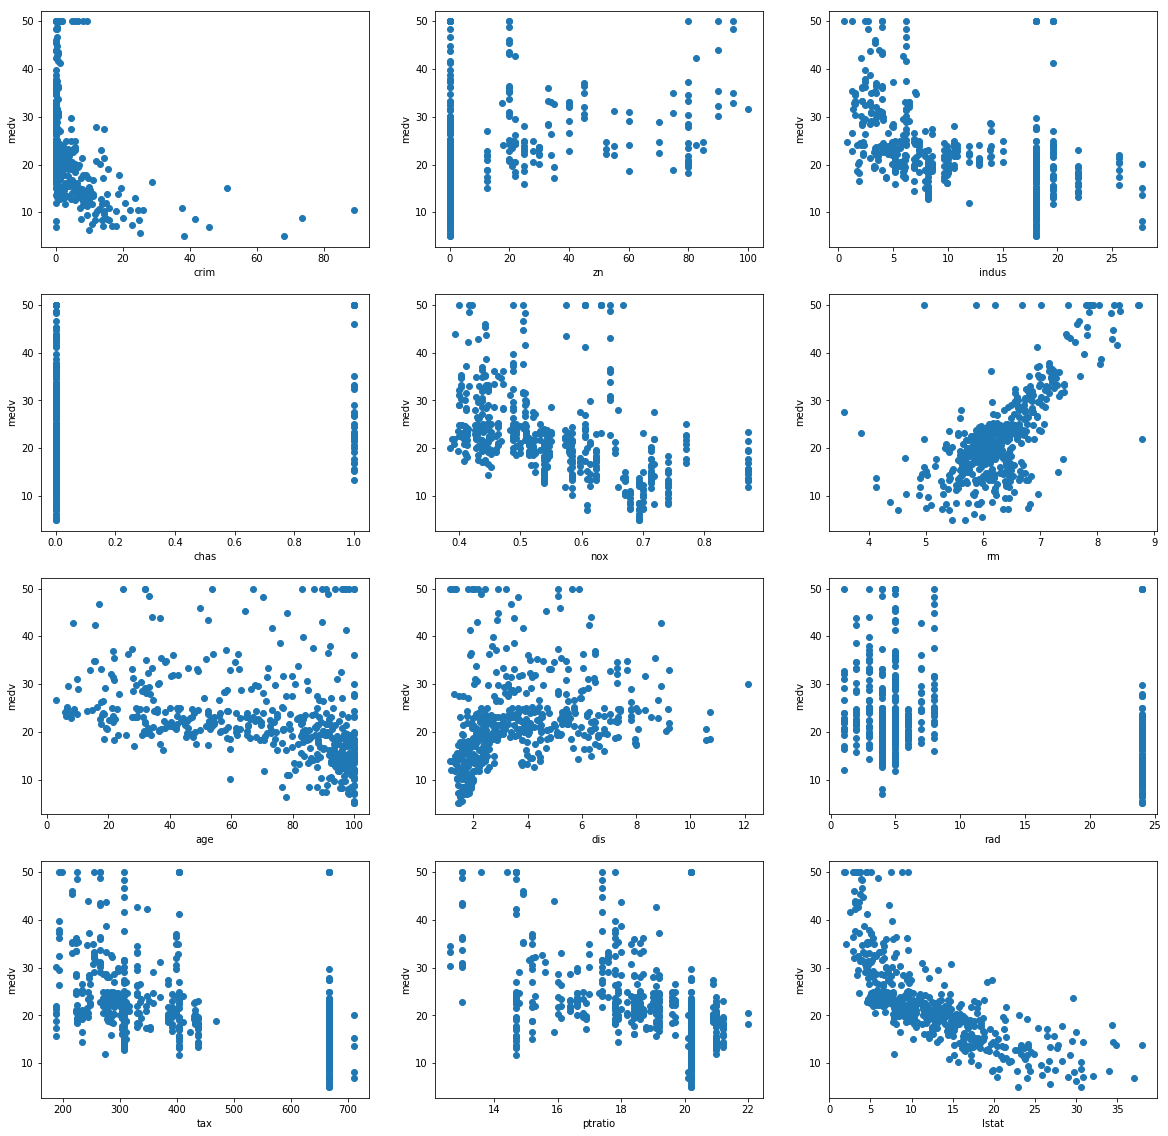

In [489]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

def plotHousingPrice(feature, label, row, col, inx):
    plt.subplot(row, col, inx)
    x = data[feature]
    y = data[label]
    plt.plot(x, y, 'o')
    plt.xlabel(feature)
    plt.ylabel(label)


plotHousingPrice('crim', 'medv', 4,3,1)
plotHousingPrice('zn', 'medv', 4,3,2)
plotHousingPrice('indus', 'medv', 4,3,3)
plotHousingPrice('chas', 'medv', 4,3,4)
plotHousingPrice('nox', 'medv', 4,3,5)
plotHousingPrice('rm', 'medv', 4,3,6)
plotHousingPrice('age', 'medv', 4,3,7)
plotHousingPrice('dis', 'medv', 4,3,8)
plotHousingPrice('rad', 'medv', 4,3,9)
plotHousingPrice('tax', 'medv', 4,3,10)
plotHousingPrice('ptratio', 'medv', 4,3,11)
plotHousingPrice('lstat', 'medv', 4,3,12)


### Data Selection
Let's select feature, rm, age and lstat as those has some linear relation with houseing price.
And split the dataset as for training and test.

In [490]:
import pandas as pd

def selectData(dataFields):
    dataset = data[dataFields]
    return dataset

def splitTrainDataset(dataset):
    train_dataset = dataset.sample(frac=0.8,random_state=0)
    test_dataset = dataset.drop(train_dataset.index)
    return train_dataset, test_dataset
        
def selectLables(dataset, labelField):
    labels = dataset.pop(labelField)
    return labels
    
dataset = selectData(["rm", "ptratio", "lstat", "medv"])
train_dataset, test_dataset = splitTrainDataset(dataset)

train_labels = selectLables(train_dataset,'medv')
test_labels = selectLables(test_dataset, 'medv')

### Normalize the data

In [491]:
def normalize(dataset):
    stats = dataset.describe()
    stats = stats.transpose()
    return (dataset - stats['mean']) / stats['std']


### Linear Regression Model

In [492]:
import tensorflow as tf
import numpy

X = tf.placeholder("float")
Y = tf.placeholder("float")
    
rng = numpy.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
    
y_hat = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(y_hat-Y, 2))/(2*normed_train_data.size)
   
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


### Model Training

Training Finished!
('Training cost=', 11.328943, 'Weights=', 5.8313694, 'bias=', 22.320875, '\n')


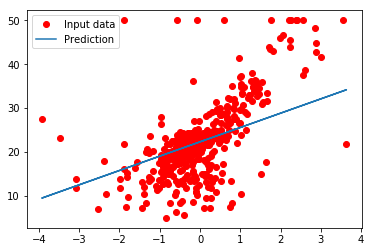

('Testing cost=', 327.97772)
('Absolute mean square loss difference:', 316.64877)


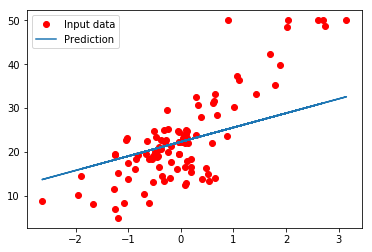

In [494]:
def train(features, labels, epochs, debug):
    DEBUG_STEP = 50
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        for epoch in range(epochs):
            for (x, y) in zip(features, labels):
                session.run(optimizer, feed_dict={X: x, Y: y})
                
            if debug and (epoch+1) % DEBUG_STEP == 0:
                c = session.run(cost, feed_dict={X: features, Y: labels})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "Weights=", session.run(W), "bias=", session.run(b))
                
        print("Training Finished!")
        training_cost = session.run(cost, feed_dict={X: features, Y: labels})
        weight = session.run(W)
        bias = session.run(b)
        
        return training_cost, weight, bias
    
def test(features, labels):
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        testing_cost = session.run( tf.reduce_sum(tf.pow(y_hat - Y, 2)) / (2 * features.shape[0]), feed_dict={X: features, Y: labels})
        return testing_cost

    
def plotRegression(features, labels, weight, bias, label_data, label_line):
    plt.plot(features, labels, 'ro', label='Input data')
    plt.plot(features, weight * features + bias, label=label_line)
    plt.legend()
    plt.show()
        

normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

train_features = normed_train_data.pop('rm')
test_features = normed_test_data.pop('rm')

training_cost, weight, bias = train(train_features, train_labels, 1000, False)
print("Training cost=", training_cost, "Weights=", weight, "bias=", bias, '\n') 

plotRegression(train_features, train_labels, weights, bias, 'Training data', 'Prediction')

testing_cost = test(test_features, test_labels)
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

plotRegression(test_features, test_labels, weights, bias, 'Test data', 'Prediction' )
